IRIS CLASSIFICATION BY USING MACHINE LEARNING


problem statement -  Iris flower has 3 species: Setosa, Versicolor and Virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

INPUT: 
Sepal Length 
Sepal width 
Petal length 
Petal width  

OUTPUT:
Class of Flower

In [ ]:
IRIS CLASSIFICATION

In [10]:
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=850)

In [11]:
#importing all neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import seaborn as sns

In [3]:
iris = pd.read_csv("/IRIS.csv")  #loading dataset
print(type(iris))  #type of dataset
iris.head()

<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Check the data info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#As we can see from the above info that the our dataset has 5columns
#and each columns has 150 values.
#There is no Null values in the dataset.
iris.isnull()  #We can also check the null values using df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


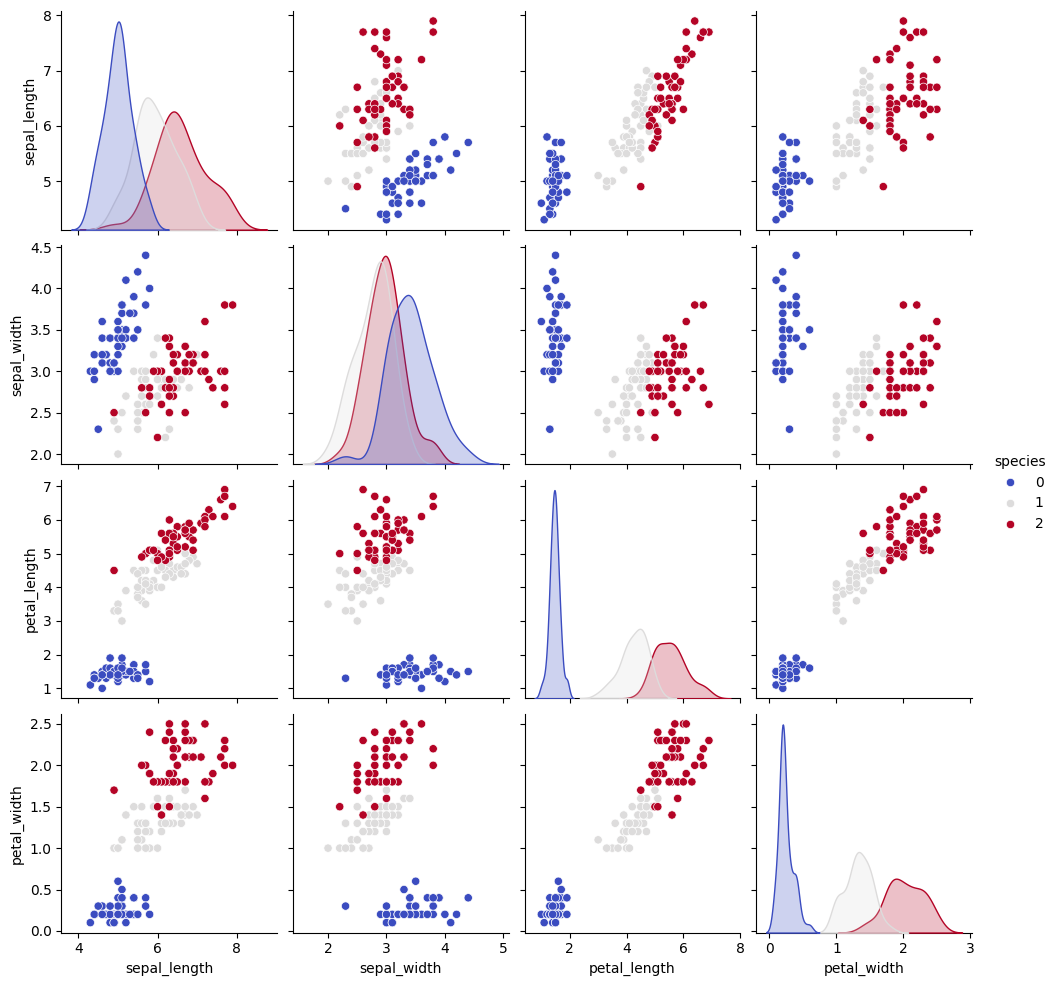

In [62]:
# visualize the whole dataset
sns.pairplot(iris[['sepal_length','sepal_width','petal_length','petal_width','species']], hue="species", diag_kind='kde', palette="coolwarm")

In [ ]:
#to determine outliners
#if the standard deviation is very large then the data may have outliners

In [14]:
#Statistical Analysis
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# box plot can also help identify outliers.

<Axes: >

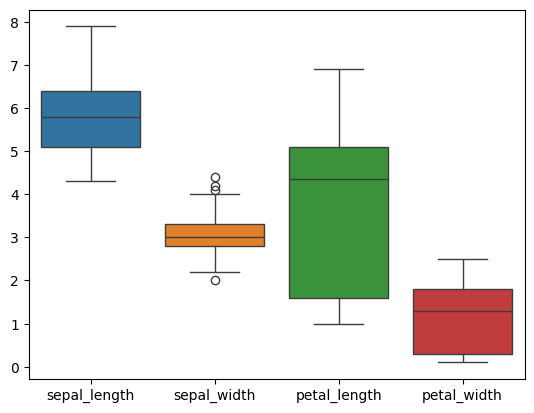

In [15]:
sns.boxplot(iris)

In [ ]:
#Interquartile Range (IQR): 
#The IQR (difference between the 75% and 25% quartiles) can help identify outliers.
#Values that are below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR) are often considered outliers.
#(1.5)is generally used value

In [38]:

q1, q3 = np.percentile(iris['sepal_width'], [25, 75])  # Identify the quartiles
iqr = q3 - q1    # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)   # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['sepal_width'] >= lower_bound) & (iris['sepal_width'] <= upper_bound)]  # Drop the outliers

q1, q3 = np.percentile(iris['sepal_length'], [25, 75])  # Identify the quartiles

iqr = q3 - q1  # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)  # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['sepal_length'] >= lower_bound) & (iris['sepal_length'] <= upper_bound)]  # Drop the outliers

q1, q3 = np.percentile(iris['petal_length'], [25, 75])  # Identify the quartiles

iqr = q3 - q1  # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)  # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['petal_length'] >= lower_bound) & (iris['petal_length'] <= upper_bound)]  # Drop the outliers

q1, q3 = np.percentile(iris['petal_width'], [25, 75])  # Identify the quartiles

iqr = q3 - q1   # Calculate the interquartile range

lower_bound = q1 - (1.5 * iqr)  # Calculate the lower and upper bounds
upper_bound = q3 + (1.5 * iqr)

clean_data = iris[(iris['petal_width'] >= lower_bound) & (iris['petal_width'] <= upper_bound)]  # Drop the outliers


     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [37]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import pandas as pd
encoder = LabelEncoder()  # Create a LabelEncoder object
clean_data['species'] = encoder.fit_transform(clean_data['species'])  # Encode the 'species' column
scaler = MinMaxScaler()  # Normalize the data
normalized_data = scaler.fit_transform(clean_data)
normalized_df = pd.DataFrame(normalized_data, columns=clean_data.columns)  # Convert the normalized data back to a DataFrame
standard_scaler = StandardScaler()  # Standardize the data
standardized_data = standard_scaler.fit_transform(normalized_df)
standardized_df = pd.DataFrame(standardized_data, columns=clean_data.columns)  # Convert the standardized data back to a DataFrame
print("Original DataFrame:")
print(clean_data.head())
print("\nNormalized DataFrame:")
print(normalized_df.head())
print("\nStandardized DataFrame:")
print(standardized_df.head())


Original DataFrame:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

Normalized DataFrame:
   sepal_length  sepal_width  petal_length  petal_width  species
0      0.222222     0.625000      0.067797     0.041667      0.0
1      0.166667     0.416667      0.067797     0.041667      0.0
2      0.111111     0.500000      0.050847     0.041667      0.0
3      0.083333     0.458333      0.084746     0.041667      0.0
4      0.194444     0.666667      0.067797     0.041667      0.0

Standardized DataFrame:
   sepal_length  sepal_width  petal_length  petal_width   species
0     -0.900681     1.032057     -1.341272    -1.312977 -1.224745
1     -1.143017    -

In [50]:
#SEPARATING INPUT COLUMNS AND THE OUTPUT COLUMNS
X = clean_data.drop(columns =['species'])
Y = clean_data.species
print(X.shape)
print(X)
print(Y.shape)
print(Y)


(150, 4)
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
(150,)
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [21]:
# splitting dataset into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

In [22]:
print(X_train.shape)
print(X_train)
print(y_test.shape)
print(y_test)

(120, 4)
     sepal_length  sepal_width  petal_length  petal_width
101           5.8          2.7           5.1          1.9
129           7.2          3.0           5.8          1.6
141           6.9          3.1           5.1          2.3
40            5.0          3.5           1.3          0.3
51            6.4          3.2           4.5          1.5
..            ...          ...           ...          ...
110           6.5          3.2           5.1          2.0
82            5.8          2.7           3.9          1.2
15            5.7          4.4           1.5          0.4
97            6.2          2.9           4.3          1.3
60            5.0          2.0           3.5          1.0

[120 rows x 4 columns]
(30,)
147    2
99     1
121    2
3      0
31     0
32     0
4      0
137    2
73     1
96     1
107    2
132    2
46     0
87     1
74     1
108    2
2      0
55     1
59     1
68     1
120    2
117    2
105    2
94     1
85     1
138    2
18     0
130    2
149    2
42  

In [23]:

from sklearn.svm import SVC

model_svc=SVC()
model_svc.fit(X_train,y_train)
prediction1 = model_svc.predict(X_test)

#calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1))


0.9666666666666667


In [61]:

def predict_iris_species(model):              # Take input from the user
    
    sepal_length = float(input("Enter sepal length: "))
    sepal_width = float(input("Enter sepal width: "))
    petal_length = float(input("Enter petal length: "))
    petal_width = float(input("Enter petal width: "))
    
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    
    # Make the prediction
    prediction = model.predict(input_data)
    
    # Decode the predicted species
    species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    predicted_species = species_mapping[prediction[0]]
    
    return predicted_species

# Use the function to make a prediction
predicted_species = predict_iris_species(model_svc)
print(f"The predicted species is: {predicted_species}")


Enter sepal length: 20
Enter sepal width: 20
Enter petal length: 20
Enter petal width: 20
The predicted species is: virginica
